In [3]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
#from wpca import PCA
from sklearn.decomposition import PCA as sklearnPCA
import seaborn
from sklearn.decomposition import FactorAnalysis as fact
import os
from sklearn.cluster import KMeans
from sklearn import cluster as cls
import sklearn.metrics as metcs

In [4]:
dir = "C:/Users/Administrator/Documents/Master/MSIS-5223-70250 - Programming for Data Sci - 8282017 - 159 PM/Homework"
os.chdir(dir)
df = pd.read_table('Khanh_Pham_Export.txt',sep ='\t')

In [5]:
df.dtypes

LastName          object
FirstName         object
Gender            object
PositionTitle     object
Compensation       int64
MaxTerm            int64
StartDate         object
Name              object
Zip               object
Website           object
TypeControl       object
Teaching          object
DonorType         object
NoFTE            float64
NetPatRev        float64
InOperExp        float64
OutOperExp       float64
OperRev            int64
OperInc            int64
AvlBeds            int64
dtype: object

In [4]:
df.loc[3,'Gender']="M"

In [33]:
# Using the numerical columns
newdf = df.select_dtypes(exclude=['object'])


In [19]:
newdf.columns

Index(['Compensation', 'MaxTerm', 'NoFTE', 'NetPatRev', 'InOperExp',
       'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'],
      dtype='object')

In [7]:
newdf.columns

Index(['Compensation', 'MaxTerm', 'NoFTE', 'NetPatRev', 'InOperExp',
       'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'],
      dtype='object')

# Conduct Principla Component Analysis

In [8]:
pca_solver = sklearnPCA(n_components = 9)
pca_solver.fit(newdf)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
 print(pca_solver.explained_variance_ratio_)

[  9.69251603e-01   2.35922651e-02   7.15610064e-03   2.31135244e-08
   8.40899239e-09   1.17745216e-12   2.19166049e-14   1.91173052e-18
   1.29105002e-22]


In [10]:
pca_solver.components_

array([[ -5.73732201e-06,  -4.26149230e-11,   3.52002651e-06,
          2.08521756e-03,   5.32573065e-01,   2.50828440e-01,
          8.07986542e-01,   2.45850364e-02,   3.80948285e-07],
       [  2.43938529e-04,   5.38539190e-09,   6.13892958e-06,
         -5.80307137e-04,   4.05945055e-01,   1.56299945e-01,
         -2.90156252e-01,  -8.52401251e-01,   3.84467429e-07],
       [ -3.07115461e-04,  -1.11445637e-08,  -3.01742707e-06,
          7.02379205e-04,  -5.49157749e-01,   8.14035851e-01,
          1.13856702e-01,  -1.51021400e-01,  -9.33482700e-07],
       [  9.95809034e-01,   2.27762571e-05,   3.77820759e-04,
          9.14553775e-02,  -3.08269012e-04,   1.20584166e-04,
         -6.68725300e-05,   1.20784477e-04,   9.53425773e-05],
       [  9.14559207e-02,  -1.34115042e-07,  -5.55615533e-03,
         -9.95791011e-01,   4.63086640e-04,   1.01944691e-03,
          1.93507999e-03,   4.52828798e-04,   4.72060700e-05],
       [  1.30433387e-04,  -2.86145144e-04,   9.99875628e-01,
   

In [11]:
print(pca_solver.n_samples_)

62


# Eigenvalues

# Base on Eigenvalues, there is 7 out of 9 variables should be keep

In [12]:
eigenvalues = pca_solver.explained_variance_

In [13]:
eigenvalues

array([  2.68380283e+17,   6.53256468e+15,   1.98148377e+15,
         6.40000411e+09,   2.32840240e+09,   3.26029840e+05,
         6.06858387e+03,   5.29347361e-01,   3.57484444e-05])

# Based on a cree plot. There are seven variables of 

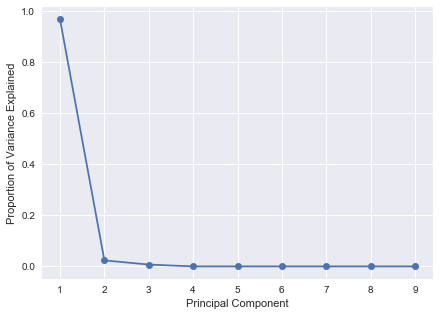

In [14]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9], pca_solver.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
#plt.xlim(0.75,4.25) 
#plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.show()


# Scree plot show that from component #3  where the plot levels off and becomes flat; anything prior to that leveling off is a component that remains. Hence, there are two availables (Compansation and max term) should be retain.

In [21]:
fa = fact(n_components=9)

In [22]:
fa.fit(newdf)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=9,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [23]:
import factor_rotation as fr
A = fa.components_
L, T = fr.rotate_factors(A,'varimax')
L.max(0)

array([  1.12443904e+07,   2.55576406e+03,   2.65969294e+04,
         2.85209634e+05,   4.07334161e+07,   4.87218938e+07,
         4.43435761e-01,   8.04444838e+06,   8.63586298e+03])

In [24]:
L.transpose()

array([[ -1.84880229e+03,   1.12443904e+07,  -4.03268906e+07,
          8.05709110e+03,   2.30046086e+04,   1.97681118e+01,
         -3.91118043e+01,   4.53969165e+01,   0.00000000e+00],
       [  6.29439963e-01,  -2.76517435e+03,  -3.18048682e+03,
          2.55576406e+03,  -3.65623535e+03,   3.24167191e+00,
         -1.27117351e+02,   4.82967468e+01,   0.00000000e+00],
       [  5.01067670e+03,  -2.08832051e+07,  -2.65818174e+06,
          2.65969294e+04,  -5.61429945e+02,  -7.03045983e+01,
          1.35594771e+02,  -1.49035956e+02,   0.00000000e+00],
       [  8.07544742e+03,  -3.12185666e+07,   2.85209634e+05,
         -1.69136109e+04,   4.46915771e+04,  -1.14103605e+02,
          1.87078190e+02,  -2.24369040e+02,   0.00000000e+00],
       [ -1.19195648e+04,   4.07334161e+07,   1.68099312e+07,
          9.07248747e+03,   5.50364134e+04,   2.65633093e+01,
         -6.08164717e+01,   6.71497667e+01,   0.00000000e+00],
       [ -1.43456887e+04,   4.87218938e+07,  -6.16978683e+05,
   

# I would consolidate Max Term variable and remove all variable.

# First I find the highest value of each factor. With the highest value of each factor consecutive: {1.12443904e+07,   2.55576406e+03,   2.65969294e+04, 2.85209634e+05,   4.07334161e+07,   4.87218938e+07, 4.43435761e-01,   8.04444838e+06,   8.63586298e+03} 

# After I transpose matrix to find in each factor which variable has highest value.

# From array below I found variable (Max term ) in factor 5 and factor 6 has highest value compare than the left.

# The result of my factor analysis partly agree with my PCA. While FA has only one variable retain, PCA has two.

In [79]:
cluster = newdf[['Compensation', 'MaxTerm', 'NoFTE', 'NetPatRev', 'InOperExp',
       'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']]

In [68]:
clustervar= cluster.copy()
clustervar.columns

Index(['Compensation', 'MaxTerm', 'NoFTE', 'NetPatRev', 'InOperExp',
       'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'],
      dtype='object')

In [81]:
clustervar['Compensation'] = preprocessing.scale(clustervar['Compensation'].astype('float64'))
clustervar['MaxTerm'] = preprocessing.scale(clustervar['MaxTerm'].astype('float64'))
clustervar['NoFTE'] = preprocessing.scale(clustervar['NoFTE'].astype('float64'))
clustervar['NetPatRev'] = preprocessing.scale(clustervar['NetPatRev'].astype('float64'))
clustervar['InOperExp'] = preprocessing.scale(clustervar['InOperExp'].astype('float64'))
clustervar['OutOperExp'] = preprocessing.scale(clustervar['OutOperExp'].astype('float64'))
clustervar['OperRev'] = preprocessing.scale(clustervar['OperRev'].astype('float64'))
clustervar['OperInc'] = preprocessing.scale(clustervar['OperInc'].astype('float64'))
clustervar['AvlBeds'] = preprocessing.scale(clustervar['AvlBeds'].astype('float64'))



In [22]:
df.dtypes

LastName          object
FirstName         object
Gender            object
PositionTitle     object
Compensation       int64
MaxTerm            int64
StartDate         object
Name              object
Zip               object
Website           object
TypeControl       object
Teaching          object
DonorType         object
NoFTE            float64
NetPatRev        float64
InOperExp        float64
OutOperExp       float64
OperRev            int64
OperInc            int64
AvlBeds            int64
dtype: object

In [49]:
km = cls.KMeans(n_clusters=2).fit(newdf)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
km = cls.KMeans(n_clusters=4).fit(newdf)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 3, 0,
       0, 3, 0, 3, 3, 1, 0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 2, 1, 3,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
km = cls.KMeans(n_clusters=3).fit(df.loc[:,['Compensation', 'MaxTerm',]])
km.labels_   

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0,
       0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1])

In [25]:
df['Teaching'].unique()
df['TypeControl'].unique()

array(['District', 'Non Profit', 'City/County', 'Investor'], dtype=object)

In [22]:
df['Teaching'] = df['Teaching'].astype('object') 
df.Teaching.replace(['Small/Rural', 'Teaching'],[1,2], inplace=True)

In [50]:
#Create a confusion matrix
cm = metcs.confusion_matrix(df.Teaching, km.labels_)
print(cm)       #Printed matrix for Teaching variable

[[ 0  0  0]
 [45  0  0]
 [ 9  8  0]]


In [46]:
df.TypeControl.replace(['District', 'Non Profit', 'City/County', 'Investor'],[1,2,3,4], inplace=True)
df['TypeControl'] = df['TypeControl'].astype('object') 

In [ ]:

#Create a confusion matrix
cm = metcs.confusion_matrix(df.TypeControl, km.labels_)
print(cm)       #Printed matrix for type control